### Importação dos dados



In [116]:
import pandas as pd

import locale

locale.setlocale(locale.LC_ALL, "pt_BR.UTF-8")

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [117]:
# Adicionar um "ID" as lojas para facilitar saber de onde partiu a base de dados
loja['ID_Loja'] = 1
loja2['ID_Loja'] = 2
loja3['ID_Loja'] = 3
loja4['ID_Loja'] = 4

loja.head()

# Concatenar todos os dados
lojas_df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Calcular o faturamento total
faturamento_total = lojas_df["Preço"].sum()

# Calcular o faturamento por loja
faturamento_por_loja = lojas_df.groupby("ID_Loja")["Preço"].sum().reset_index()

#Formatar a saida para ter valores em R$ e ate duas casas decimais.
faturamento_total = locale.currency(faturamento_total, grouping=True)
faturamento_por_loja["Preço"] = faturamento_por_loja["Preço"].apply(lambda x: locale.currency(x, grouping=True))

print("Faturamento Total de Todas as Lojas:",faturamento_total)
print("\nFaturamento por Loja:")

# Mostrar o faturamento aberto por loja
display(faturamento_por_loja)

Faturamento Total de Todas as Lojas: R$ 5.871.490,79

Faturamento por Loja:


,ID_Loja,Preço
0,1,"R$ 1.534.509,12"
1,2,"R$ 1.488.459,06"
2,3,"R$ 1.464.025,03"
3,4,"R$ 1.384.497,58"


# 2. Vendas por Categoria


In [118]:
# Concatenar todos os dados
lojas_df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Calcular o faturamento por categoria
faturamento_por_loja = lojas_df.groupby("Categoria do Produto")["Preço"].sum().reset_index()

#Formatar a saida para ter valores em R$ e ate duas casas decimais.
faturamento_por_loja["Preço"] = faturamento_por_loja["Preço"].apply(lambda x: locale.currency(x, grouping=True))

print("\nFaturamento por Categoria de Produto:")

# Mostrar o faturamento aberto por loja
display(faturamento_por_loja)


Faturamento por Categoria de Produto:


,Categoria do Produto,Preço
0,brinquedos,"R$ 98.140,86"
1,eletrodomesticos,"R$ 1.766.337,03"
2,eletronicos,"R$ 2.214.099,72"
3,esporte e lazer,"R$ 190.635,39"
4,instrumentos musicais,"R$ 465.029,67"
5,livros,"R$ 50.260,74"
6,moveis,"R$ 1.010.214,00"
7,utilidades domesticas,"R$ 76.773,38"


# 3. Média de Avaliação das Lojas

In [119]:
# Adicionar um "ID" as lojas para facilitar saber de onde partiu a base de dados
loja['ID_Loja'] = 1
loja2['ID_Loja'] = 2
loja3['ID_Loja'] = 3
loja4['ID_Loja'] = 4

loja.head()

# Concatenar todos os dados
lojas_df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Calcular o faturamento por loja
avaliacao_por_loja = lojas_df.groupby("ID_Loja")["Avaliação da compra"].mean().reset_index().round(2)

print("\nAvaliação por Loja:")

# Mostrar o faturamento aberto por loja
display(avaliacao_por_loja)


Avaliação por Loja:


,ID_Loja,Avaliação da compra
0,1,3.98
1,2,4.04
2,3,4.05
3,4,4.00


# 4. Produtos Mais e Menos Vendidos

In [120]:
# Concatenar todos os dados
lojas_df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Calcular o faturamento por categoria
faturamento_por_produto = lojas_df.groupby("Produto")["Preço"].sum().reset_index()

prod_minimo = faturamento_por_produto.loc[faturamento_por_produto["Preço"].idxmin()]
prod_maximo = faturamento_por_produto.loc[faturamento_por_produto["Preço"].idxmax()]

#Formatar a saida para ter valores em R$ e ate duas casas decimais.
produto_menor_venda_formatado = f"Produto: {prod_minimo['Produto']}, Preço: {locale.currency(prod_minimo['Preço'], grouping=True)}"
produto_maior_venda_formatado = f"Produto: {prod_maximo['Produto']}, Preço: {locale.currency(prod_maximo['Preço'], grouping=True)}"


print("O produto com menor venda foi:", prod_minimo)
print("O produto com maior venda foi:", prod_maximo)

O produto com menor venda foi: Produto    Cubo mágico 8x8
Preço              3638.68
Name: 16, dtype: object
O produto com maior venda foi: Produto    TV Led UHD 4K
Preço           576652.7
Name: 47, dtype: object


# 5. Frete Médio por Loja


In [130]:
# Adicionar um "ID" as lojas para facilitar saber de onde partiu a base de dados
loja['ID_Loja'] = 1
loja2['ID_Loja'] = 2
loja3['ID_Loja'] = 3
loja4['ID_Loja'] = 4

loja.head()

# Concatenar todos os dados
lojas_df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Calcular o faturamento por categoria
frete_por_loja = lojas_df.groupby("ID_Loja")["Frete"].mean().reset_index()

#Formatar a saida para ter valores em R$ e ate duas casas decimais.
frete_por_loja["Frete"] = frete_por_loja["Frete"].apply(lambda x: locale.currency(x, grouping=True))

print("\nFrete médio por Loja:")

# Mostrar o faturamento aberto por loja
display(frete_por_loja)


Frete médio por Loja:


,ID_Loja,Frete
0,1,"R$ 34,69"
1,2,"R$ 33,62"
2,3,"R$ 33,07"
3,4,"R$ 31,28"


# Graficos

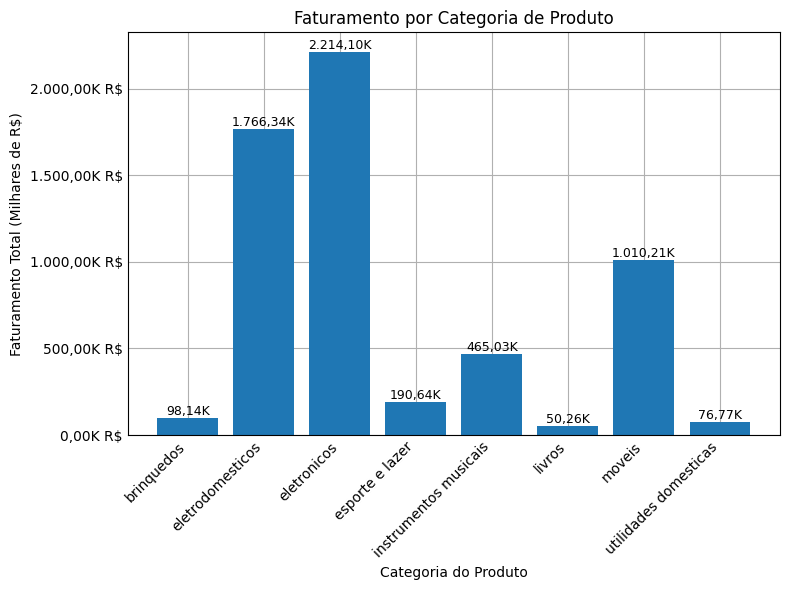

In [132]:
import matplotlib.pyplot as plt
import pandas as pd
import locale
from matplotlib.ticker import FuncFormatter

# Localização dos dados no Brasil
locale.setlocale(locale.LC_ALL, "pt_BR.UTF-8")

# Calcular o faturamento por categoria
faturamento_por_categoria = lojas_df.groupby("Categoria do Produto")["Preço"].sum().reset_index()

# Ajustar o tamanho do grafico
fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(faturamento_por_categoria["Categoria do Produto"], faturamento_por_categoria["Preço"])

# Formatar os dados em R$ e dividir os valores por 1000 (K) para facilitar visualização
def currency_formatter(x, pos):
    return locale.currency(x / 1000, grouping=True, symbol=False) + 'K R$'

ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

ax.set_ylabel('Faturamento Total (Milhares de R$)')
ax.set_xlabel('Categoria do Produto')
ax.set_title('Faturamento por Categoria de Produto')

plt.xticks(rotation=45, ha='right')

# Rotulos dos dados
for bar in bars:
    yval = bar.get_height()

    label = locale.currency(yval / 1000, grouping=True, symbol=False) + 'K'
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, label, va='bottom', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

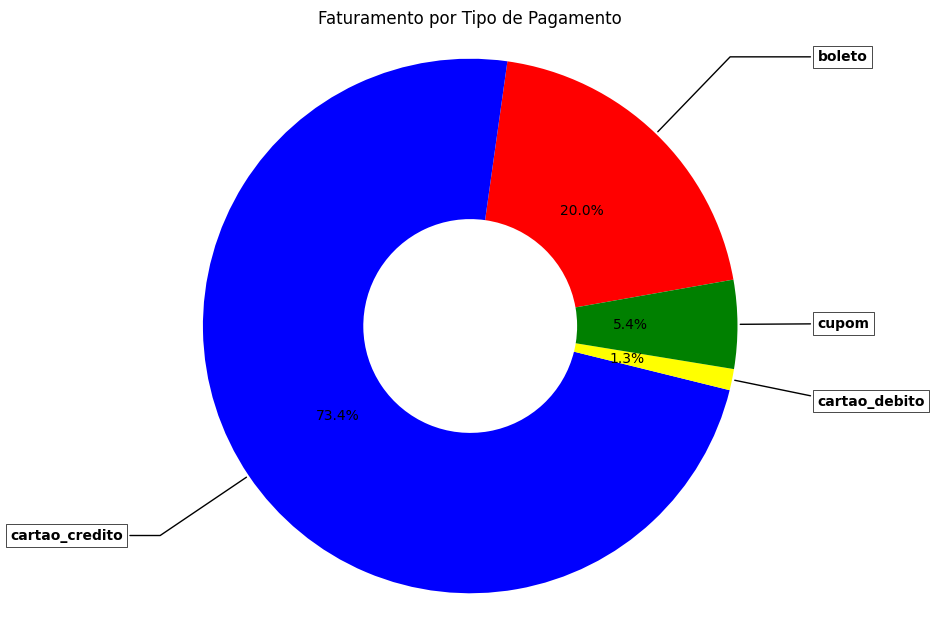

In [133]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter
import numpy as np

# Calcular o faturamento por tipo de pagamento
faturamento_por_tipo_pagamento = lojas_df.groupby("Tipo de pagamento")["Preço"].sum().reset_index()

sizes = faturamento_por_tipo_pagamento["Preço"]
labels = faturamento_por_tipo_pagamento["Tipo de pagamento"]

# Ajustar o tamanho do grafico
fig, ax = plt.subplots(figsize=(8, 6))

# Edição geral do grafico
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', startangle=10, wedgeprops=dict(width=0.6), colors=["red", "Blue", "Yellow", "Green"])

ax.axis('equal')
ax.set_title('Faturamento por Tipo de Pagamento')

# Adiciona as notas no grafico estilo rosca
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.5)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.3*np.sign(x), 1.4*y),
                weight= "bold",
                horizontalalignment=horizontalalignment, **kw),


plt.show()

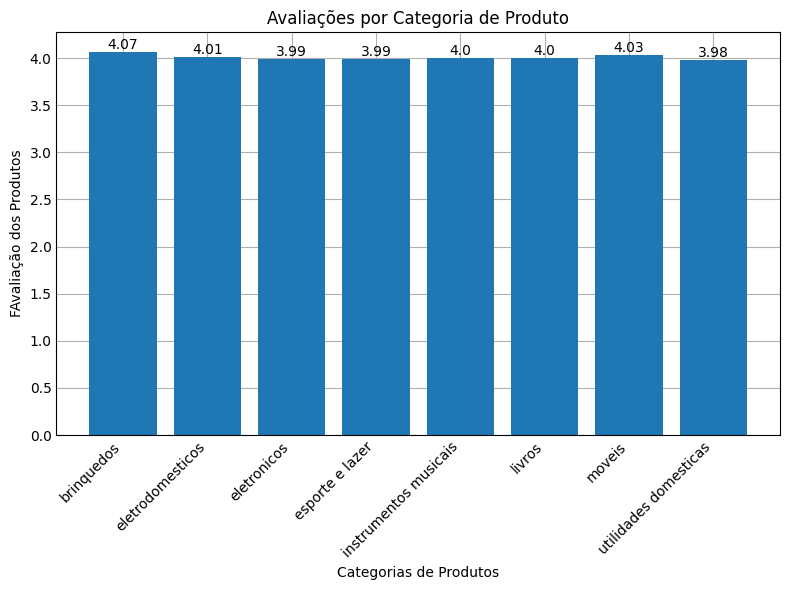

In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import locale
from matplotlib.ticker import FuncFormatter

# Adicionar um "ID" as lojas para facilitar saber de onde partiu a base de dados
loja['ID_Loja'] = 1
loja2['ID_Loja'] = 2
loja3['ID_Loja'] = 3
loja4['ID_Loja'] = 4

loja.head()

# Concatenar todos os dados
lojas_df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Localização dos dados no Brasil
locale.setlocale(locale.LC_ALL, "pt_BR.UTF-8")

# Calcular o faturamento por categoria
faturamento_por_categoria = lojas_df.groupby("Categoria do Produto")["Avaliação da compra"].mean().reset_index()

# Ajustar o tamanho do grafico
fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(faturamento_por_categoria["Categoria do Produto"], faturamento_por_categoria["Avaliação da compra"])

ax.set_ylabel('FAvaliação dos Produtos')
ax.set_xlabel('Categorias de Produtos')
ax.set_title('Avaliações por Categoria de Produto')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom', ha='center')

plt.tight_layout()
plt.show()